##Library import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

##Coding categorical variables

In [ ]:
data = sns.load_dataset("tips")
data = pd.get_dummies(data,['sex', 'smoker', 'day', 'time'],drop_first=True)##nos asigna un 0 o 1 a las variables categoricas
data

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


##Graphic

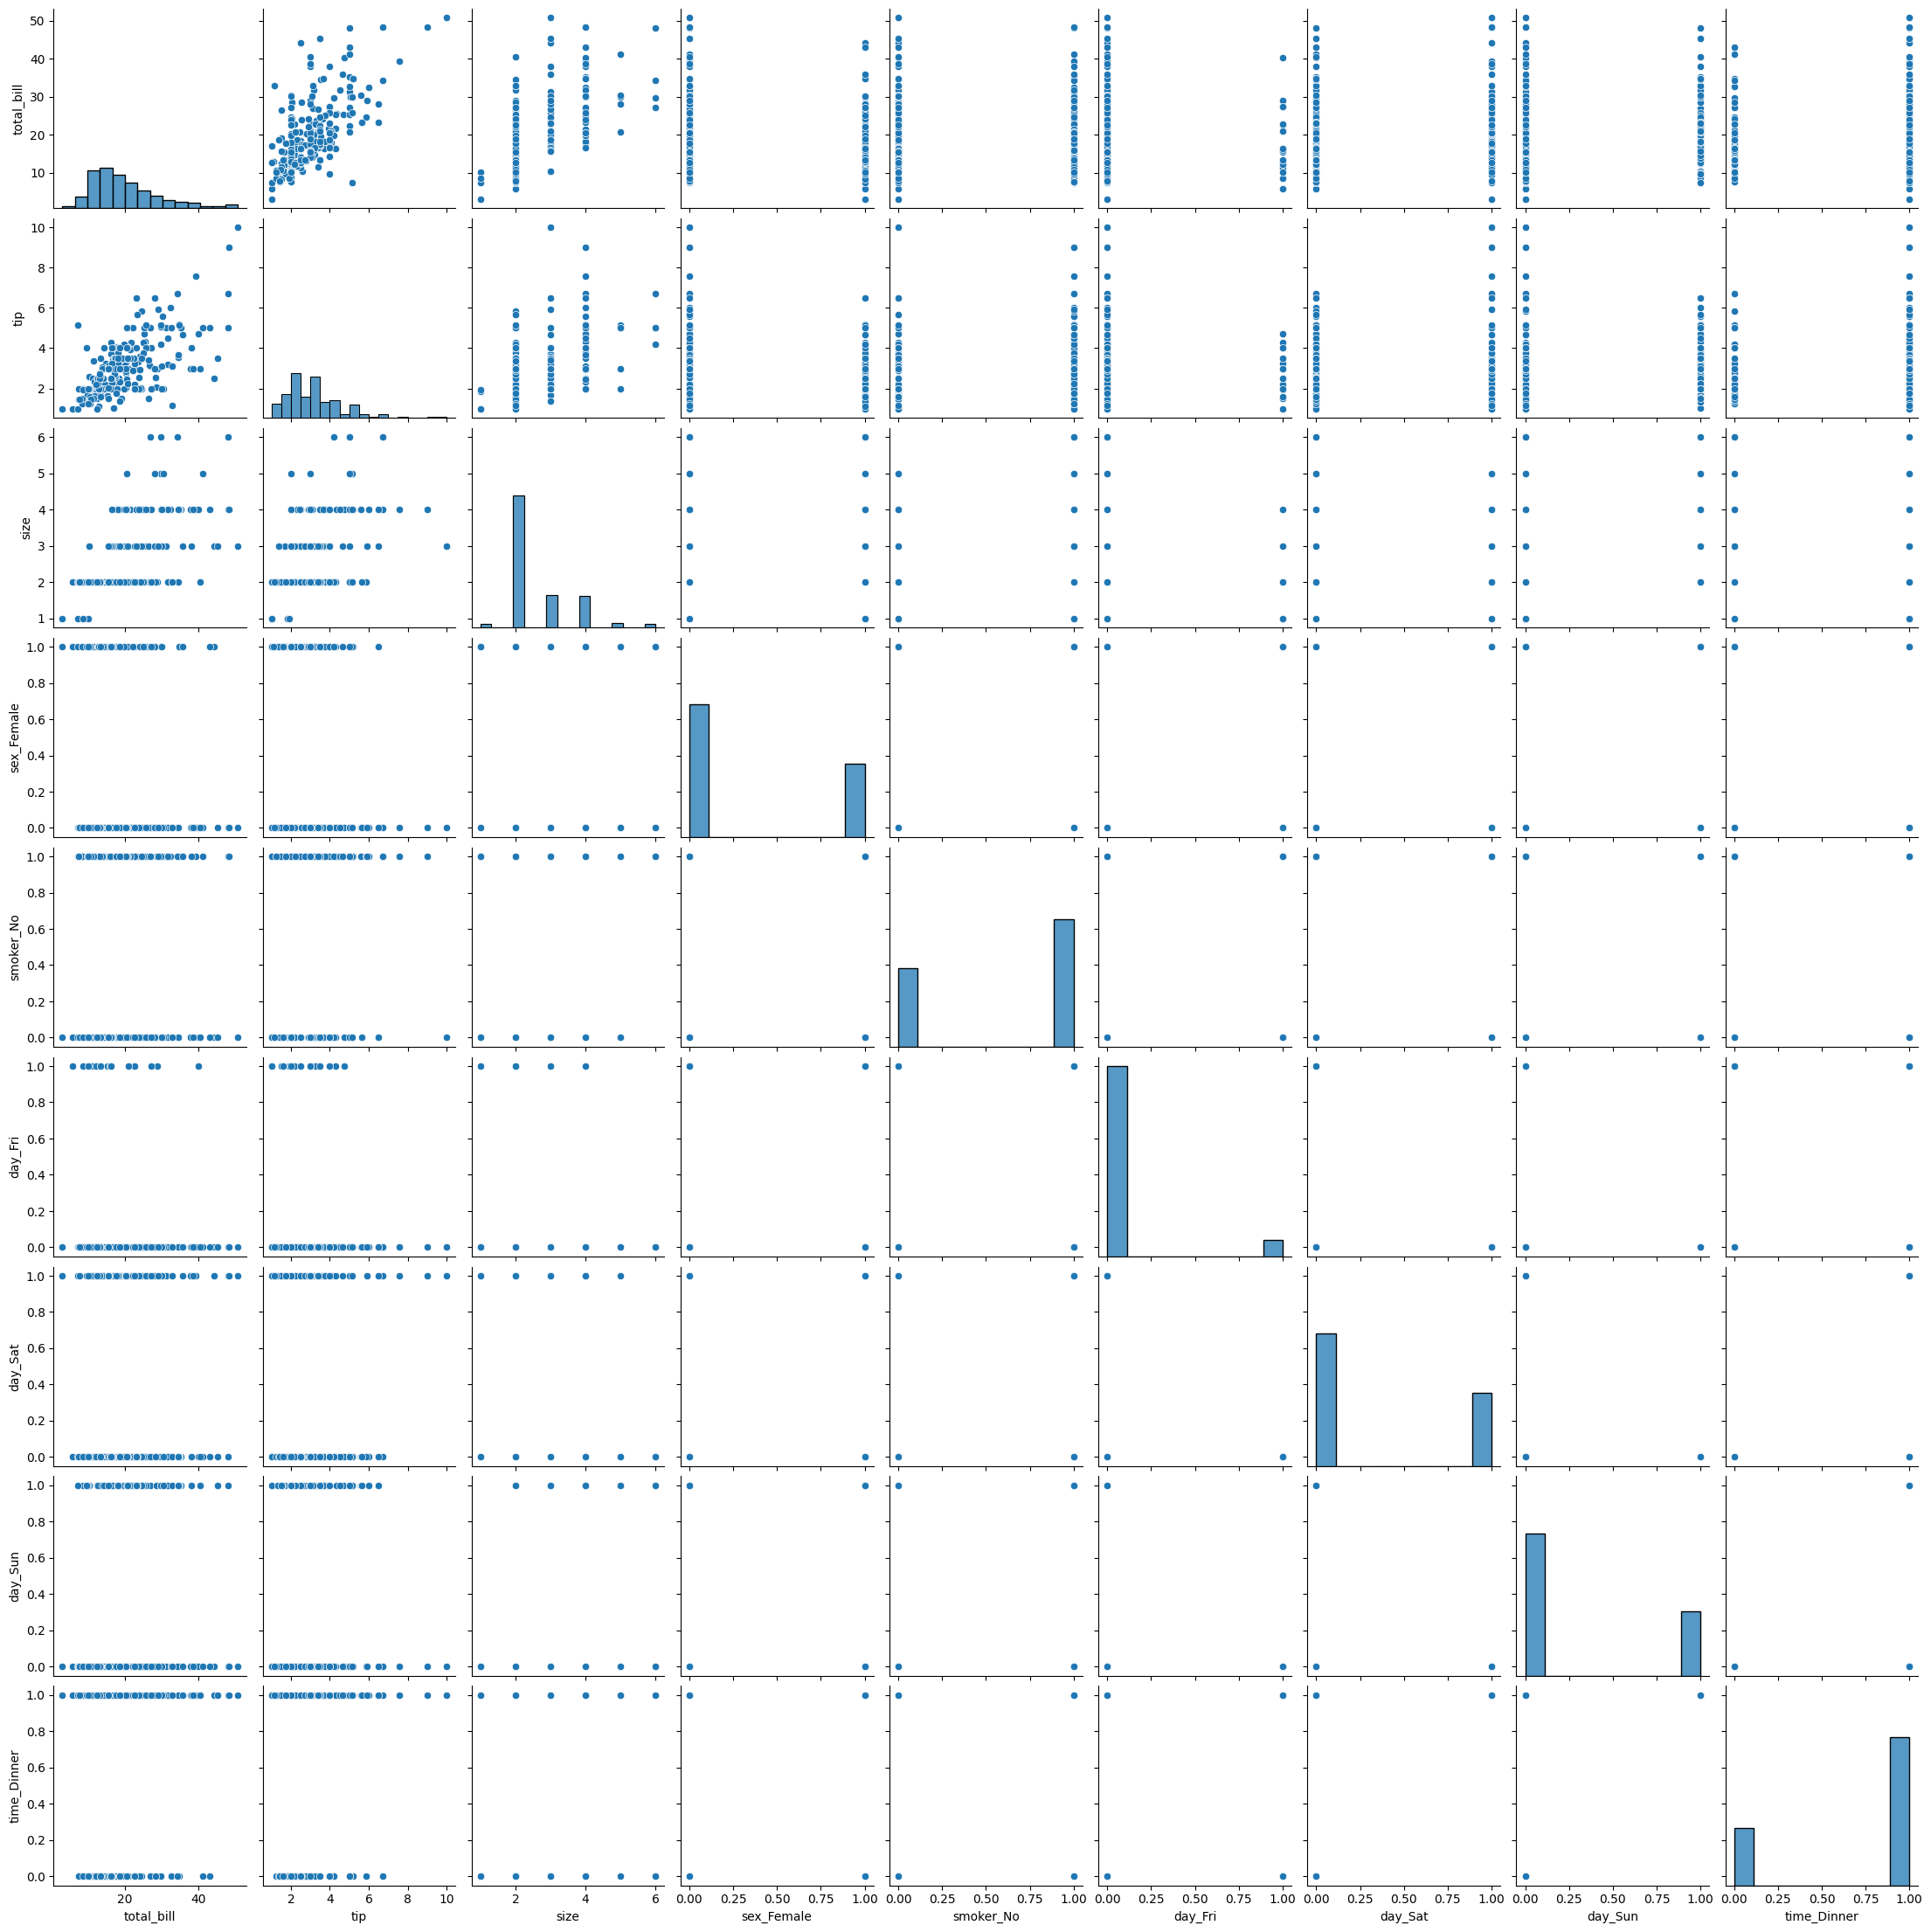

In [ ]:
sns.pairplot(data)
plt.show()

##Data-Split

In [ ]:
X_train = data['total_bill']
Y_train = data['tip']

X_train=np.array(X_train)
Y_train=np.array(Y_train)

X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 1)

##Hyperparameters

In [ ]:
# Definimos los hiperparámetros del modelo
learning_rate = 0.0001
epochs = 100

##Initialization of model parameters

In [ ]:
# Inicializamos los parámetros del modelo
w = np.random.randn(1)
b = np.random.randn(1)

##Prediction function

In [ ]:
# Definimos la función de predicción
def predict(x):
    return w*x + b

##Loss function

In [ ]:
# Definimos la función de pérdida (mean squared error)
def mse_loss(Y_train, y_pred):
    return np.mean((y_pred - Y_train)**2)

##Model training

In [ ]:
# Entrenamos el modelo
losses = []
for epoch in range(epochs):
    # Calculamos las predicciones actuales
    y_pred = predict(X_train)

    # Calculamos el error
    loss = mse_loss(Y_train, y_pred)
    losses.append(loss)

    # Calculamos los gradientes de los parámetros
    w_grad = np.mean(2*(y_pred - Y_train)*X_train)
    b_grad = np.mean(2*(y_pred - Y_train))

    # Actualizamos los parámetros
    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad


##Error calculation

In [ ]:
# Imprimimos el error final y las predicciones
y_pred = predict(X_test)
mse = mse_loss(Y_test, y_pred)

print(mse)

1.1040532085840675


##Prediction

0.5804852332807855


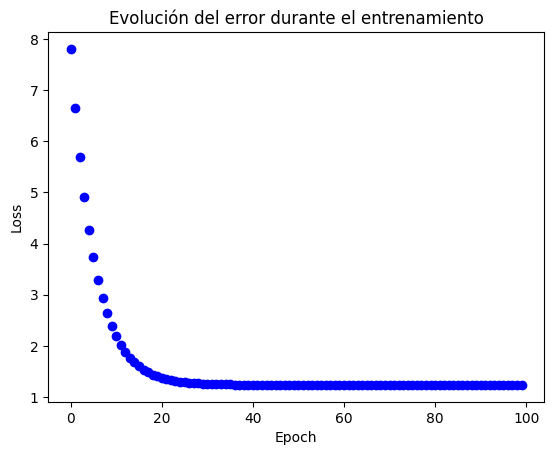

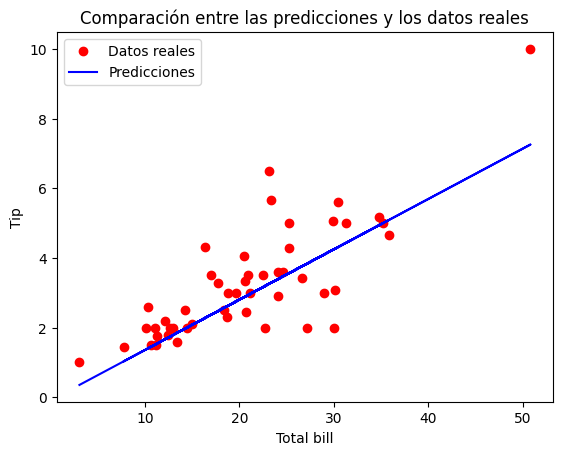

In [ ]:
R=r2_score(Y_test, y_pred)
print(R)

# Graficamos la evolución del error durante el entrenamiento
plt.plot(range(epochs), losses, 'bo')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Evolución del error durante el entrenamiento")
plt.show()

# Graficamos la comparación entre las predicciones y los datos reales
plt.plot(X_test, Y_test, "ro", label="Datos reales")
plt.plot(X_test, y_pred, "b-", label="Predicciones")
plt.legend()
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.title("Comparación entre las predicciones y los datos reales")
plt.show()
